In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sn

### Reading the Data

In [2]:
genres = pd.read_csv('genres_v2.csv')
genres

C:\Users\Brother\AppData\Local\Temp\ipykernel_32736\1679305378.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  genres = pd.read_csv('genres_v2.csv')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [3]:
playlists = pd.read_csv('playlists.csv')
playlists

,Playlist,Genre
0,19WuHd4MxWLzE1fpMmw4S4,Dark Trap
1,6XyR8uzgkSoDzHuOxxRtLH,Dark Trap
2,37Ij3ofyhvEhFEH8YZMZ2X,Dark Trap
3,07zTlfPpsxeoWdumbkNWMI,Dark Trap
4,2dClSRLsnptdkDQnpi5H2f,Dark Trap
5,3CCC01CIQgca5cu14tgszj,Underground Rap
6,6MrMW8FhdwKI34IiP3fovl,Trap Metal
7,4cuGsxDEp3w42Q8GVMTEMD,Trap Metal
8,6IeTmw4eOwpRqQXhR38WHk,Trap Metal
9,0OzrpLh3mFdRgQluMQtcwU,Trap Metal


In [4]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

### Data Cleanup

In [5]:
genres = genres.drop(['uri', 'song_name', 'id', 'title', 'track_href', 'analysis_url', 'Unnamed: 0', ], axis=1)
genres

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,123298,4,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,269208,4,hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,210112,4,hardstyle
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,234823,4,hardstyle
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,323200,4,hardstyle


In [6]:
genres.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
duration_ms         0
time_signature      0
genre               0
dtype: int64

In [8]:
playlists.describe()

,Genre
count,39
unique,8
top,Emo
freq,9


In [9]:
genres.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000


### variable shortcuts

In [84]:
Dark_Trap = genres[(genres['genre'] == 'Dark Trap')]
Hiphop = genres[(genres['genre'] == 'Hiphop')]
trap = genres[(genres['genre'] == 'trap')]
dnb = genres[(genres['genre'] == 'dnb')]
techno = genres[(genres['genre'] == 'techno')]
hardstyle = genres[(genres['genre'] == 'hardstyle')]
RnB = genres[(genres['genre'] == 'RnB')]
Trap_Metal = genres[(genres['genre'] == 'Trap Metal')]
techhouse = genres[(genres['genre'] == 'techhouse')]
Emo = genres[(genres['genre'] == 'Emo')]
Rap = genres[(genres['genre'] == 'Rap')]
Underground_Rap = genres[(genres['genre'] == 'Underground Rap')]
Pop = genres[(genres['genre'] == 'Pop')]
psytrance = genres[(genres['genre'] == 'psytrance')]
trance = genres[(genres['genre'] == 'trance')]

In [10]:
val = genres['valence']
dance = genres['danceability']
ts = genres['time_signature']
dur = genres['duration_ms']
loud = genres['loudness']
live = genres['liveness']
energy = genres['energy']
gen = genres['genre']
acoust = genres['acousticness']

### Preliminary Exploration of the Data

In [80]:
genres['genre'].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

C:\Users\Brother\AppData\Local\Temp\ipykernel_32736\2571628752.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = genres.corr()


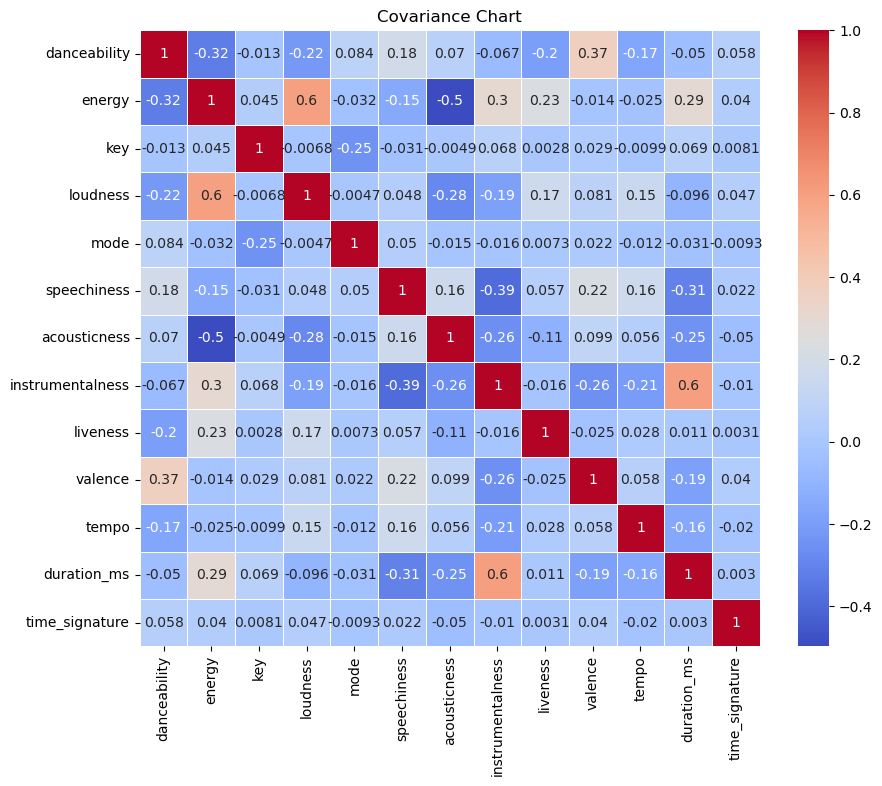

In [13]:
correlation_matrix = genres.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Covariance Chart")
plt.show()

### 1. What is the relationship between the two datasets (genres and playlists)?
After exploring both datasets thoroughly and brainstorming ways to relate the two datasets, we found the playlists data set did not contain enough relevant data to be used. Based on this, we decided to forego using this dataset moving forward in our analysis.

###  2. Do the strongest relationships between values (such as the covariance of energy and loudness) hold true across each genre individually? Why or why not?

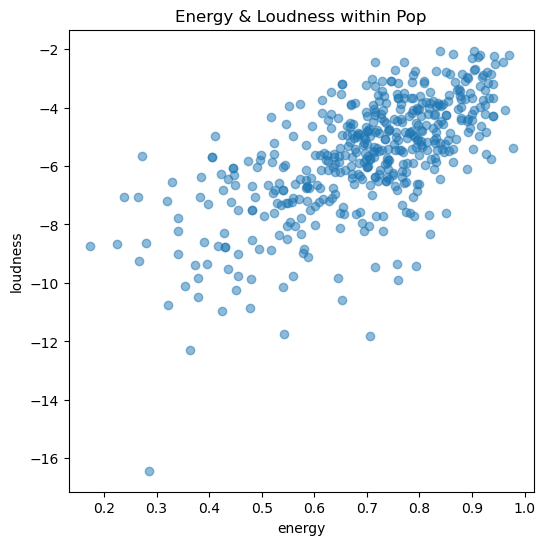

In [49]:
x = Pop['energy']
y = Pop['loudness']
plt.figure(figsize=(6, 6))
plot1 = plt.scatter(x,y,alpha=0.5)


labels = ('Pop')
               
plt.xlabel('energy')
plt.ylabel('loudness')
plt.title('Energy & Loudness within Pop')

plt.show()

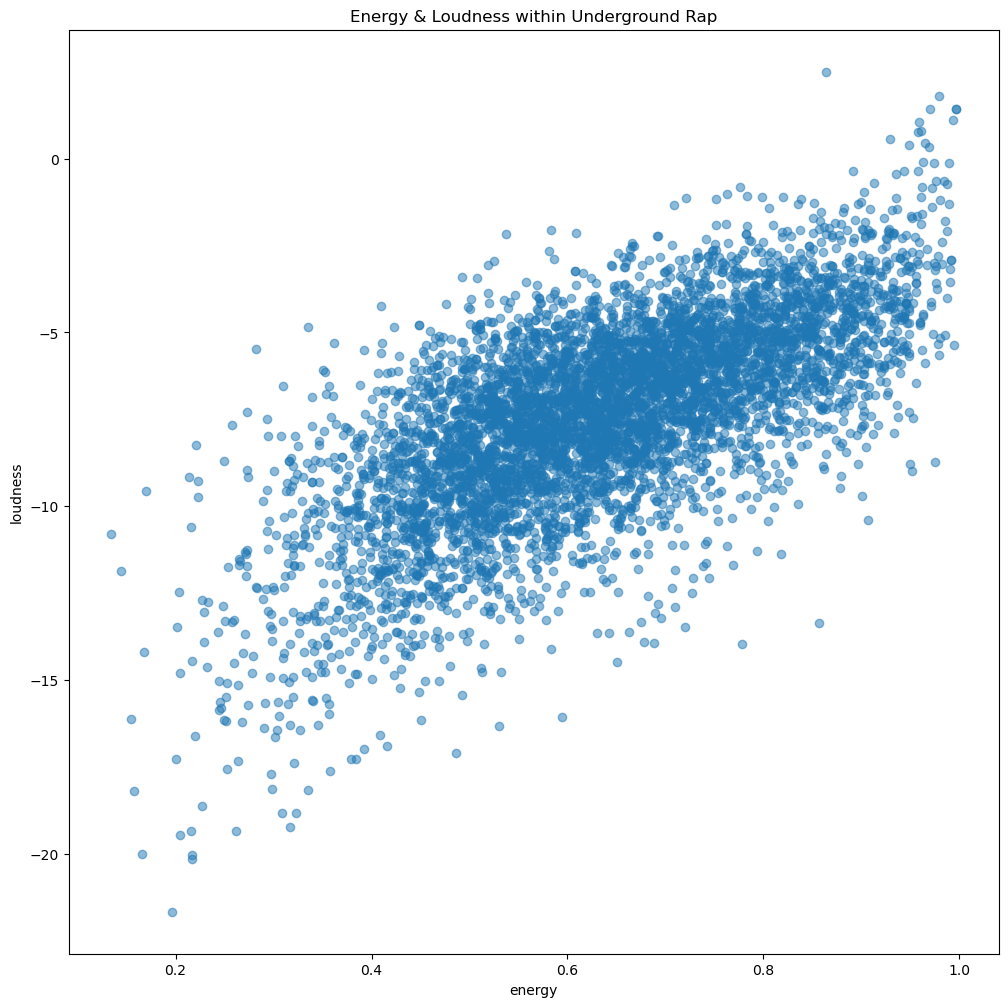

In [46]:
x = Underground_Rap['energy']
y = Underground_Rap['loudness']
plt.figure(figsize=(12, 12))
plot1 = plt.scatter(x,y,alpha=0.5)


labels = ('Underground_Rap')
               
plt.xlabel('energy')
plt.ylabel('loudness')
plt.title('Energy & Loudness within Underground Rap')

plt.show()

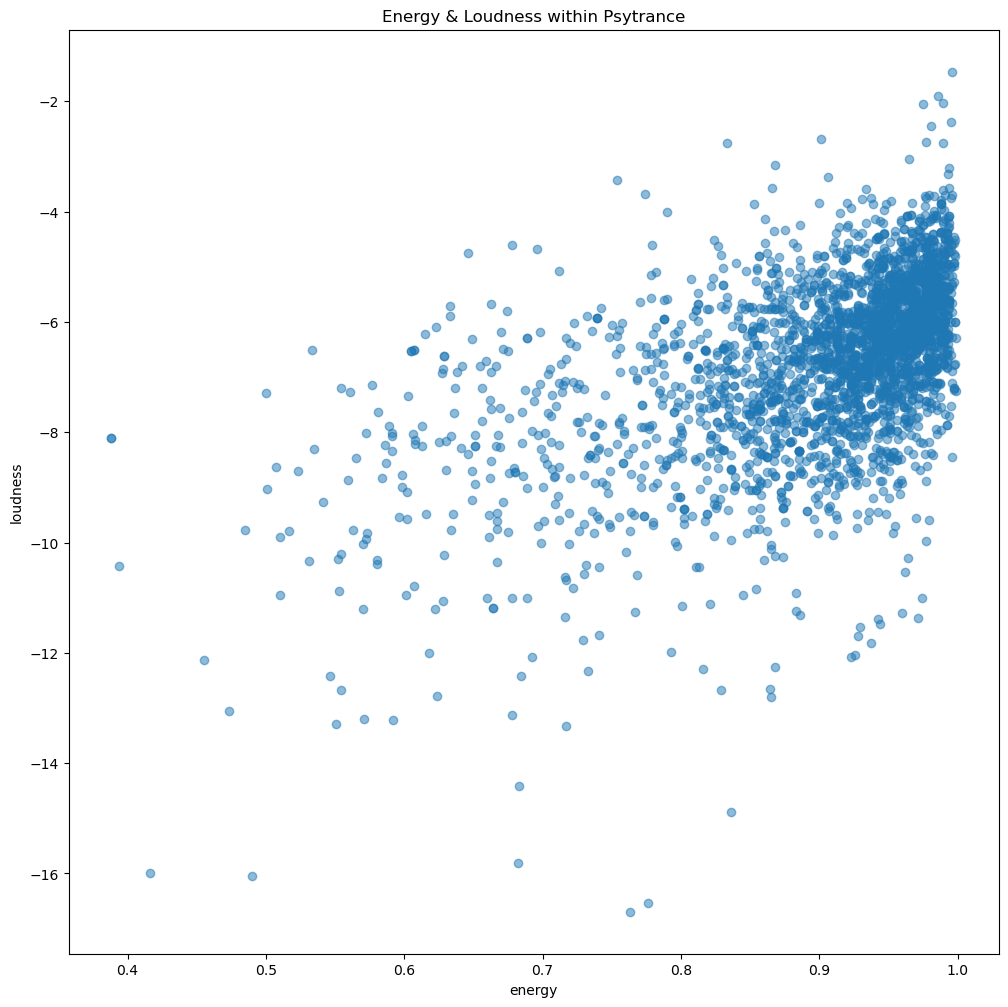

In [50]:
x = psytrance['energy']
y = psytrance['loudness']
plt.figure(figsize=(12, 12))
plot1 = plt.scatter(x,y,alpha=0.5)


labels = ('psytrance')
               
plt.xlabel('energy')
plt.ylabel('loudness')
plt.title('Energy & Loudness within Psytrance')

plt.show()

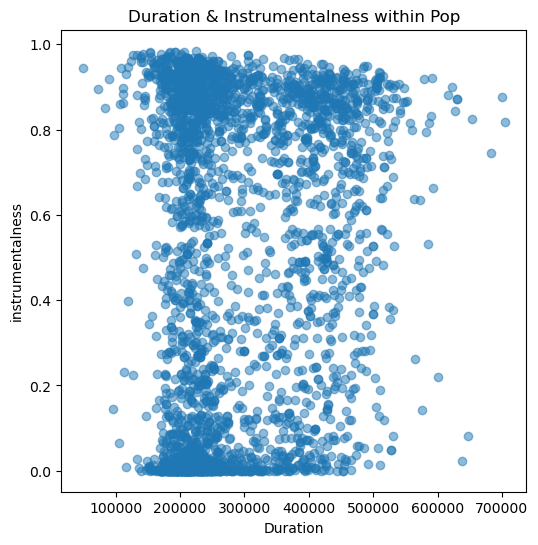

In [62]:
x = trance['duration_ms']
y = trance['instrumentalness']
plt.figure(figsize=(6, 6))
plot1 = plt.scatter(x,y,alpha=0.5)


labels = ('trance')
               
plt.xlabel('Duration')
plt.ylabel('instrumentalness')
plt.title('Duration & Instrumentalness within Pop')

plt.show()

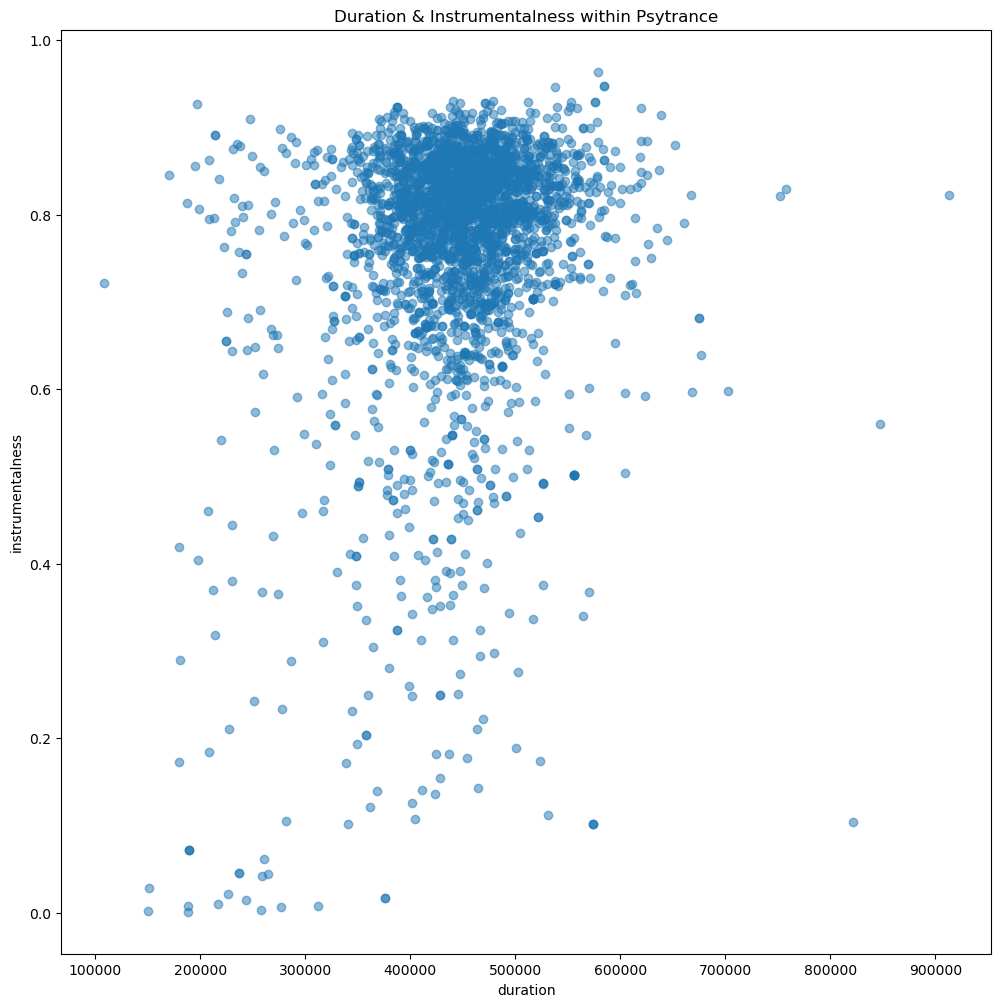

In [52]:
x = psytrance['duration_ms']
y = psytrance['instrumentalness']
plt.figure(figsize=(12, 12))
plot1 = plt.scatter(x,y,alpha=0.5)


labels = ('psytrance')
               
plt.xlabel('duration')
plt.ylabel('instrumentalness')
plt.title('Duration & Instrumentalness within Psytrance')

plt.show()

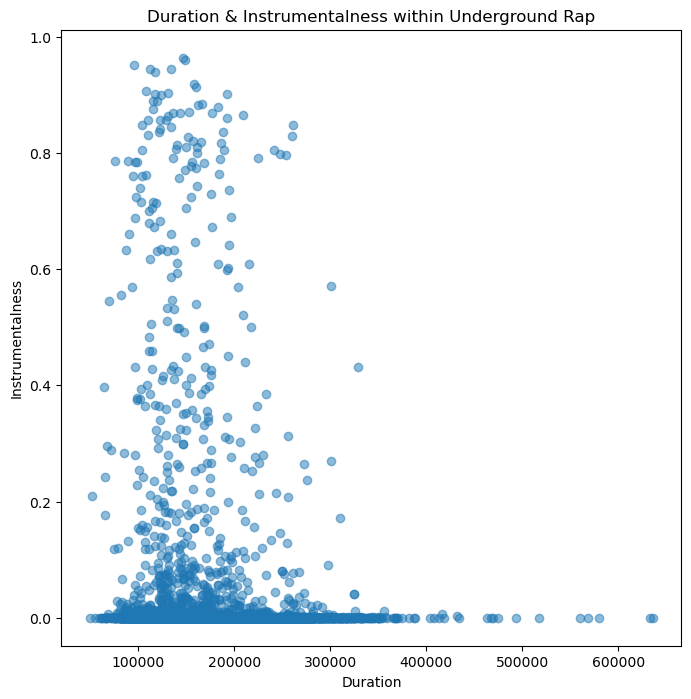

In [58]:
x = Underground_Rap['duration_ms']
y = Underground_Rap['instrumentalness']
plt.figure(figsize=(8, 8))
plot1 = plt.scatter(x,y,alpha=0.5)


labels = ('Underground_Rap')
               
plt.xlabel('Duration')
plt.ylabel('Instrumentalness')
plt.title('Duration & Instrumentalness within Underground Rap')

plt.show()

### 2. Summary
Based upon the scatter plots we can see there is a direct correlation between loudness and energy, showing graphs with random genres of music within the given data sets.

While some relationships are more universal, such as Energy vs Loudness, in the case of many more specific traits such as duration and instrumentalness, each genre has it's own sweet spot. As such, the strength of these relationships can vary quite a bit between genre.

### 3. What genre of music has a higher density of danceable songs?
### What factors into a song being more danceable? tempo, loudness, energy, valence, duration etc. 

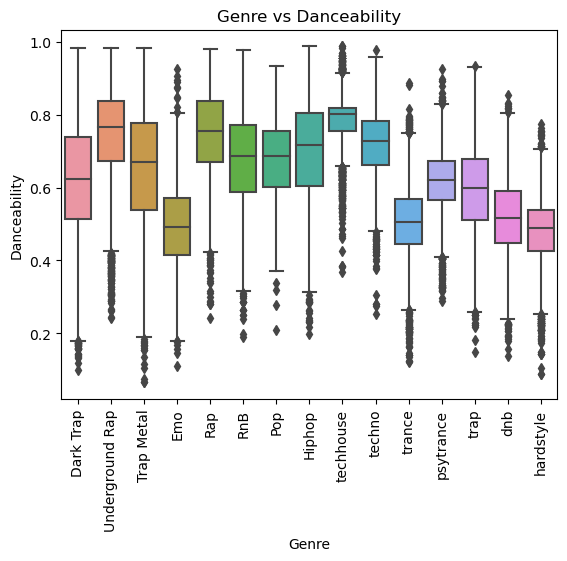

In [34]:
sn.boxplot(x='genre', y=dance, data=genres)
plt.xticks(rotation=90)
plt.title('Genre vs Danceability')
plt.xlabel('Genre')
plt.ylabel('Danceability')
plt.show()

C:\Users\Brother\AppData\Local\Temp\ipykernel_32736\2902806468.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = techhouse.corr()


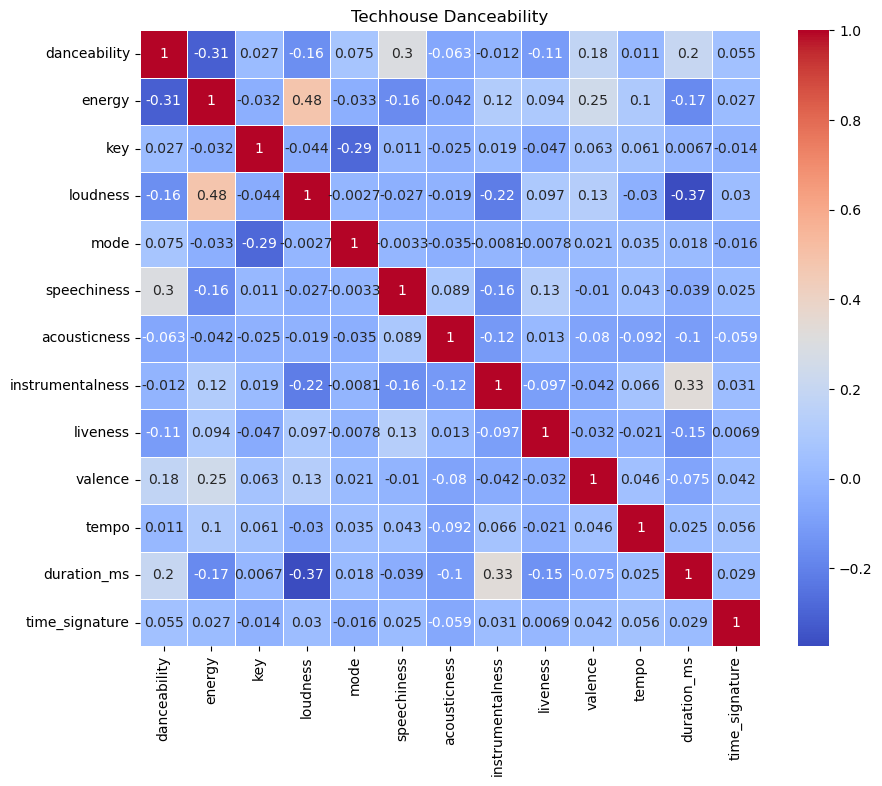

In [79]:
correlation_matrix = techhouse.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Techhouse Danceability")
plt.show()

C:\Users\Brother\AppData\Local\Temp\ipykernel_32736\4153737236.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Rap.corr()


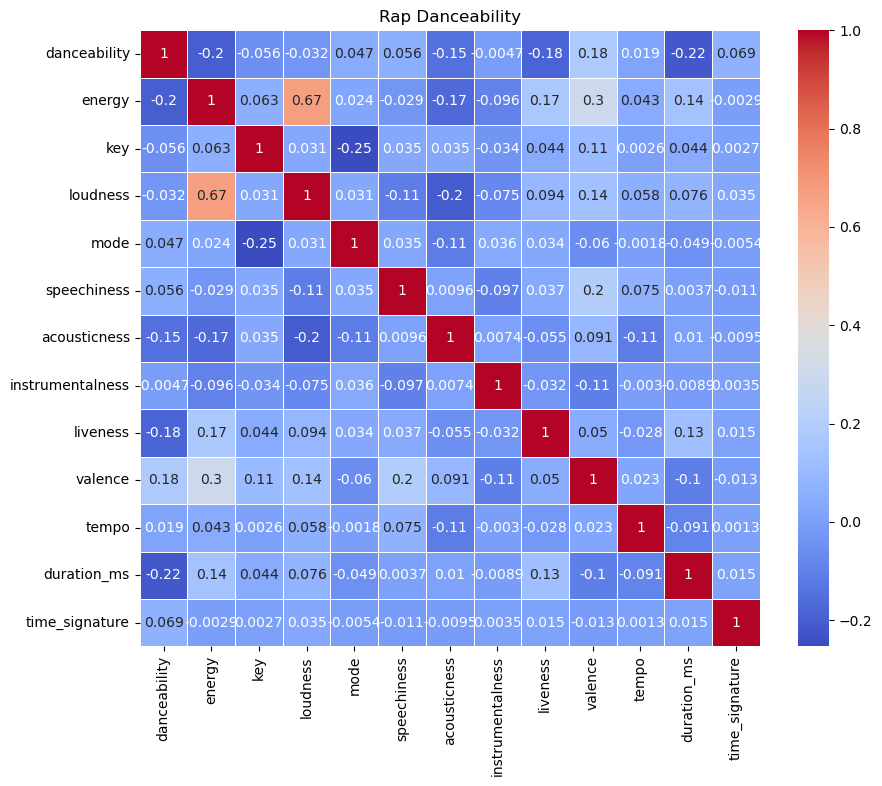

In [30]:
correlation_matrix = Rap.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Rap Danceability")
plt.show()

C:\Users\Brother\AppData\Local\Temp\ipykernel_32736\3102199160.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Emo.corr()


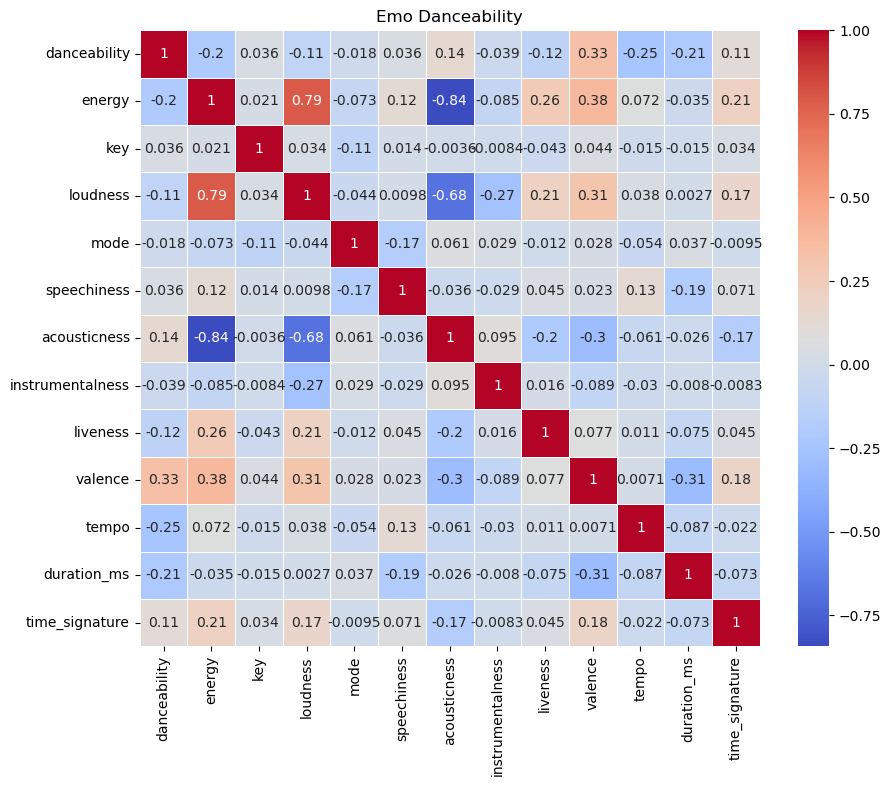

In [33]:
correlation_matrix = Emo.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Emo Danceability")
plt.show()

### 3. Summary
First looked at techhouse and rap having the highest median values of danceability then compared to emo which showed the lowest median value.

The core takeaway seems to be that, ironically, the least danceable genres are the easiest to predict. For example, the danceability in Emo music had more clear relationships with other audio features, despite it's low danceability overall as a genre. We can gather from this that when a genre has fewer danceable songs, it's easier to analyze what makes those few songs danceable.

### 4. Is there a correlation between audio features and the genre of the data set? If there is any, what can we extrapolate from this data set?

Text(0.5, 1.0, 'Different genres across different audio features')

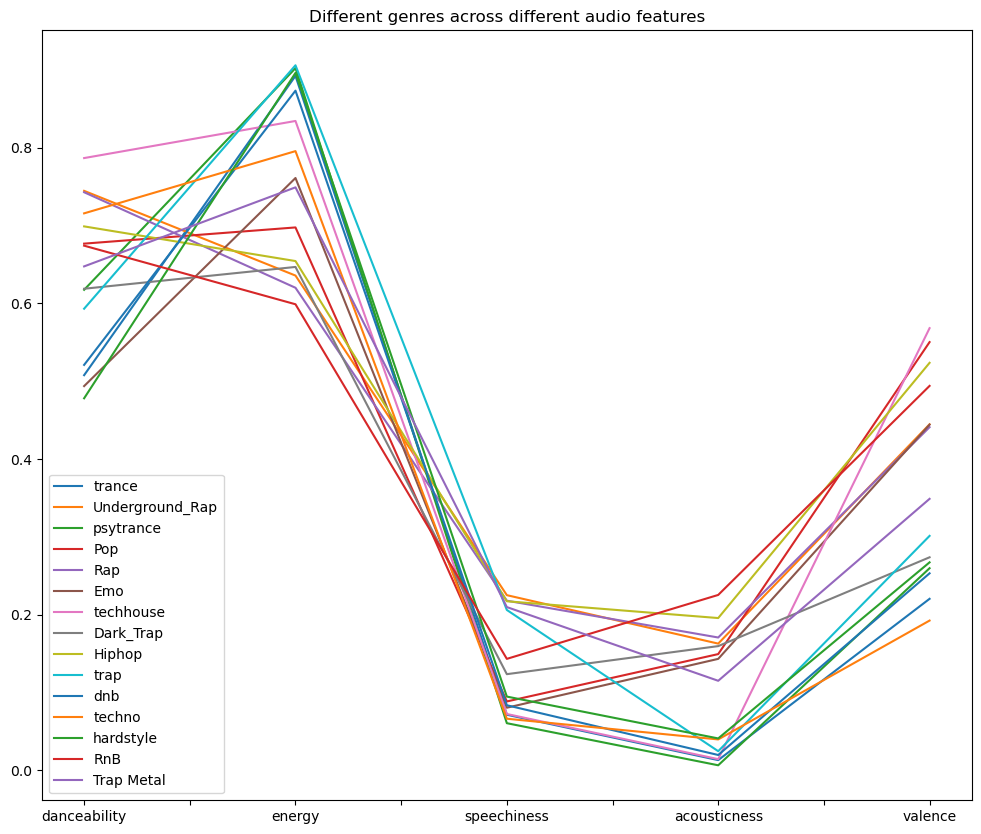

In [77]:
plt.figure(figsize=(12, 10))
trance[['danceability','energy','speechiness','acousticness','valence']].mean().plot(legend=True)
Underground_Rap[['danceability','energy','speechiness','acousticness','valence']].mean().plot(legend=True)
psytrance[['danceability','energy','speechiness','acousticness','valence']].mean().plot(legend=True)
Pop[['danceability','energy','speechiness','acousticness','valence']].mean().plot(legend=True)
Rap[['danceability','energy','speechiness','acousticness','valence']].mean().plot(legend=True)
Emo[['danceability','energy','speechiness','acousticness','valence']].mean().plot(legend=True)
techhouse[['danceability','energy','speechiness','acousticness','valence']].mean().plot(legend=True)
Dark_Trap[['danceability','energy','speechiness','acousticness','valence']].mean().plot(legend=True)
Hiphop[['danceability','energy','speechiness','acousticness','valence']].mean().plot(legend=True)
trap[['danceability','energy','speechiness','acousticness','valence']].mean().plot(legend=True)
dnb[['danceability','energy','speechiness','acousticness','valence']].mean().plot(legend=True)
techno[['danceability','energy','speechiness','acousticness','valence']].mean().plot(legend=True)
hardstyle[['danceability','energy','speechiness','acousticness','valence']].mean().plot(legend=True)
RnB[['danceability','energy','speechiness','acousticness','valence']].mean().plot(legend=True)
Trap_Metal[['danceability','energy','speechiness','acousticness','valence']].mean().plot(legend=True)
plt.legend(['trance', 'Underground_Rap', 'psytrance', 'Pop', 'Rap', 'Emo', 'techhouse', 'Dark_Trap', 'Hiphop', 'trap', 'dnb', 'techno', 'hardstyle', 'RnB', 'Trap Metal'])
plt.title("Different genres across different audio features")

C:\Users\Brother\AppData\Local\Temp\ipykernel_32736\1336213846.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  grouped = genres.groupby('genre').apply(lambda x: x.corr())


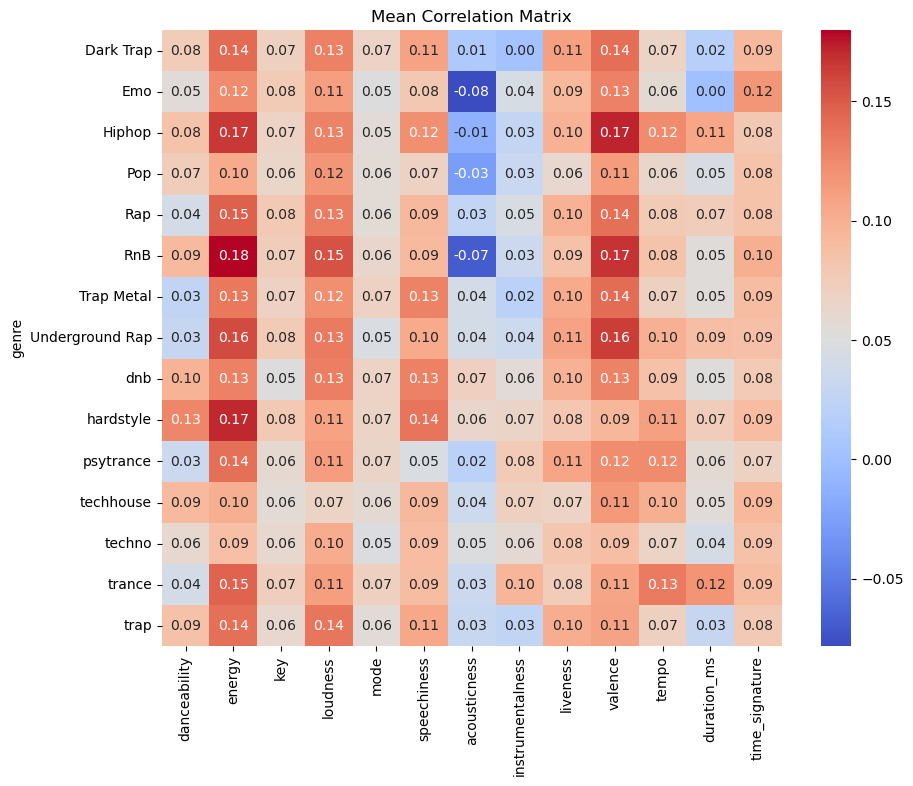

In [85]:
grouped = genres.groupby('genre').apply(lambda x: x.corr())

# Calculate mean correlation across genres
mean_corr_across_genres = grouped.groupby('genre').mean()

# Plot aggregated correlation matrix for all genres
plt.figure(figsize=(10, 8))
sn.heatmap(mean_corr_across_genres, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mean Correlation Matrix')
plt.show()

### 4. Summary
Overall each of the genres appearing in this dataset tend to follow a similar pattern, having many of the same highest and lowest values of features. One thing that we can extrapolate from this is that this dataset is looking at a particular subset of musical genres largely geared towards a certain type of energy and emotion. One might imagine, therefor, that this dataset comes from club DJ playlists, or something similar (which would also explain the absence of such large genres as country, hard rock, or classical).